In [12]:
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [13]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [14]:
def detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [21]:
def draw_landmarks(image, results):
     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [22]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [15]:
# define a video capture object
vid = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence =0.5, min_tracking_confidence=0.5) as holistic:
    while(True):
        
        # Capture the video frame
        # by frame
        ret, frame = vid.read()
        # make detection
        image, results = detection(frame, holistic)
        print(results)
        # Display the resulting frame
        cv2.imshow('frame', frame)
        
        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [23]:
frame

array([[[166, 167, 171],
        [166, 167, 171],
        [167, 168, 172],
        ...,
        [158, 157, 162],
        [158, 157, 162],
        [160, 158, 163]],

       [[164, 166, 170],
        [167, 168, 172],
        [167, 168, 172],
        ...,
        [156, 157, 162],
        [157, 159, 163],
        [157, 159, 163]],

       [[163, 165, 167],
        [161, 163, 165],
        [160, 162, 164],
        ...,
        [156, 158, 160],
        [156, 158, 160],
        [157, 159, 161]],

       ...,

       [[ 37,  37,  39],
        [ 37,  35,  38],
        [ 35,  32,  34],
        ...,
        [192, 192, 204],
        [192, 192, 203],
        [193, 193, 205]],

       [[ 37,  34,  37],
        [ 36,  33,  36],
        [ 37,  34,  37],
        ...,
        [193, 193, 205],
        [193, 193, 205],
        [195, 194, 206]],

       [[ 37,  34,  37],
        [ 37,  34,  37],
        [ 38,  35,  38],
        ...,
        [195, 194, 206],
        [193, 193, 205],
        [193, 193, 205]]

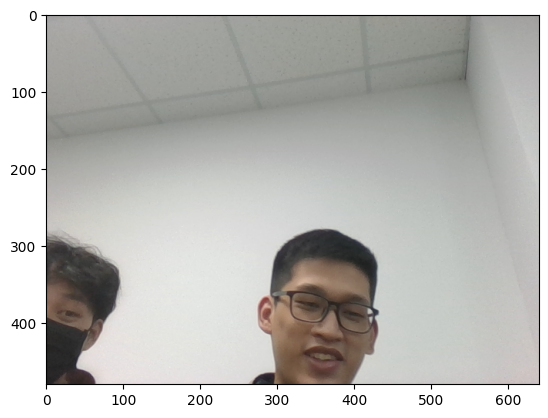

In [29]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))